In [1]:
import sklearn

In [6]:
# Load breast cancer
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Display the shape of the data
print(data.data.shape)

# Display the column names
print(data.feature_names)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)
print(predictions)

0.984251968503937
0.9787234042553191
[1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0
 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1
 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1
 1 1 0]


In [18]:
# Metrics 
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
print("confusion_matrix: \n", confusion_matrix(y_test, predictions))

# Calculate the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, predictions))

# Calculate the precision and recall
from sklearn.metrics import precision_score, recall_score
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))

# Calculate the F1 score
from sklearn.metrics import f1_score
print("F1-score: ", f1_score(y_test, predictions))

# Classification report
from sklearn.metrics import classification_report
print("classification_report: \n", classification_report(y_test, predictions))

confusion_matrix: 
 [[ 66   3]
 [  1 118]]
Accuracy:  0.9787234042553191
Precision:  0.9752066115702479
Recall:  0.9915966386554622
F1-score:  0.9833333333333334
classification_report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.98      0.99      0.98       119

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



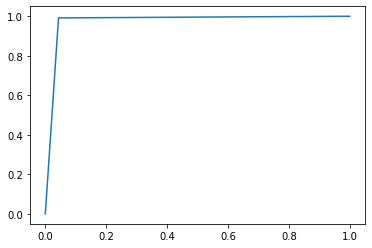

AUC:  0.9740591888929486


In [14]:
# Calculate the ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.show()

# Calculate the AUC
from sklearn.metrics import roc_auc_score
print("AUC: ", roc_auc_score(y_test, predictions))

In [19]:
# explain the model's predictions using SHAP
import shap

explainer = shap.Explainer(
    model, X_train, feature_names=data.feature_names
)
shap_values = explainer(X_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: LogisticRegression()